In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data =  pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [91]:
data.dropna(inplace=True)#we are using this as there are missing values in the total_bedroom so we are equalizing by removing the missing amount from all the other variables with the help of the dropna and inplace = true helps them to keep in place

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [93]:
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [94]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [95]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [97]:
train_data = X_train.join(y_train)#we have joined the x_train and y_train
z = train_data.drop(['ocean_proximity'],axis = 1)
z

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3139,-118.17,34.87,9.0,1507.0,293.0,761.0,278.0,3.0184,87900.0
5858,-118.34,34.19,48.0,814.0,165.0,490.0,176.0,3.1406,223100.0
19506,-121.03,37.63,5.0,2881.0,584.0,1490.0,570.0,3.0398,120000.0
4321,-118.35,34.08,52.0,1003.0,200.0,514.0,204.0,3.8472,395700.0
775,-122.10,37.65,25.0,2538.0,494.0,1185.0,501.0,4.5417,194400.0
...,...,...,...,...,...,...,...,...,...
19031,-122.02,38.37,16.0,2495.0,331.0,1118.0,338.0,6.4894,198000.0
9445,-119.90,37.49,13.0,2230.0,443.0,920.0,361.0,3.0000,112000.0
12676,-121.42,38.56,21.0,2066.0,748.0,2548.0,734.0,1.3571,55000.0
3373,-118.30,34.26,37.0,2824.0,633.0,1619.0,573.0,3.5568,184500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

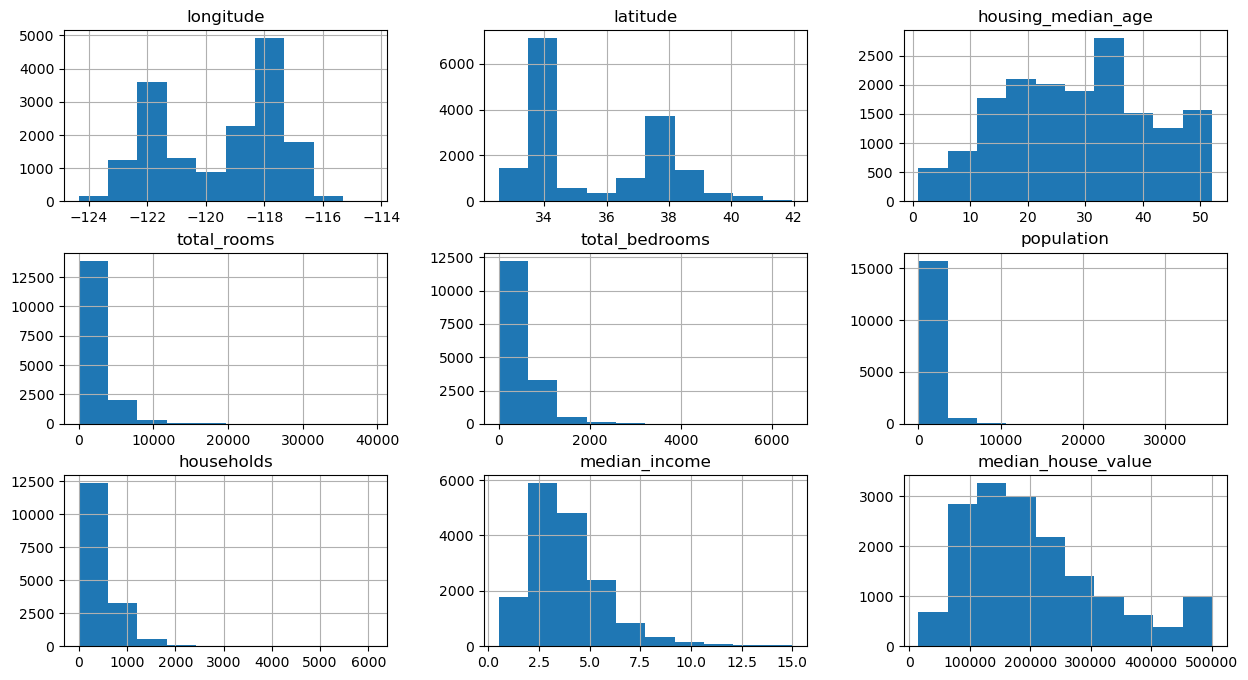

In [98]:
train_data.hist(figsize=(15,8))#hist gives us the train_data in the form of a histogram

In [99]:
z.corr()#A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925503,-0.108255,0.049931,0.073743,0.103053,0.060199,-0.017745,-0.046132
latitude,-0.925503,1.000000,0.010607,-0.041288,-0.070744,-0.110933,-0.074720,-0.077640,-0.142125
housing_median_age,-0.108255,0.010607,1.000000,-0.363978,-0.325477,-0.297137,-0.308539,-0.118742,0.107079
total_rooms,0.049931,-0.041288,-0.363978,1.000000,0.930949,0.861195,0.921203,0.202258,0.138793
total_bedrooms,0.073743,-0.070744,-0.325477,0.930949,1.000000,0.880850,0.980792,-0.002003,0.055324
population,0.103053,-0.110933,-0.297137,0.861195,0.880850,1.000000,0.908673,0.010982,-0.018152
households,0.060199,-0.074720,-0.308539,0.921203,0.980792,0.908673,1.000000,0.019238,0.070597
median_income,-0.017745,-0.077640,-0.118742,0.202258,-0.002003,0.010982,0.019238,1.000000,0.688067
median_house_value,-0.046132,-0.142125,0.107079,0.138793,0.055324,-0.018152,0.070597,0.688067,1.000000


<Axes: >

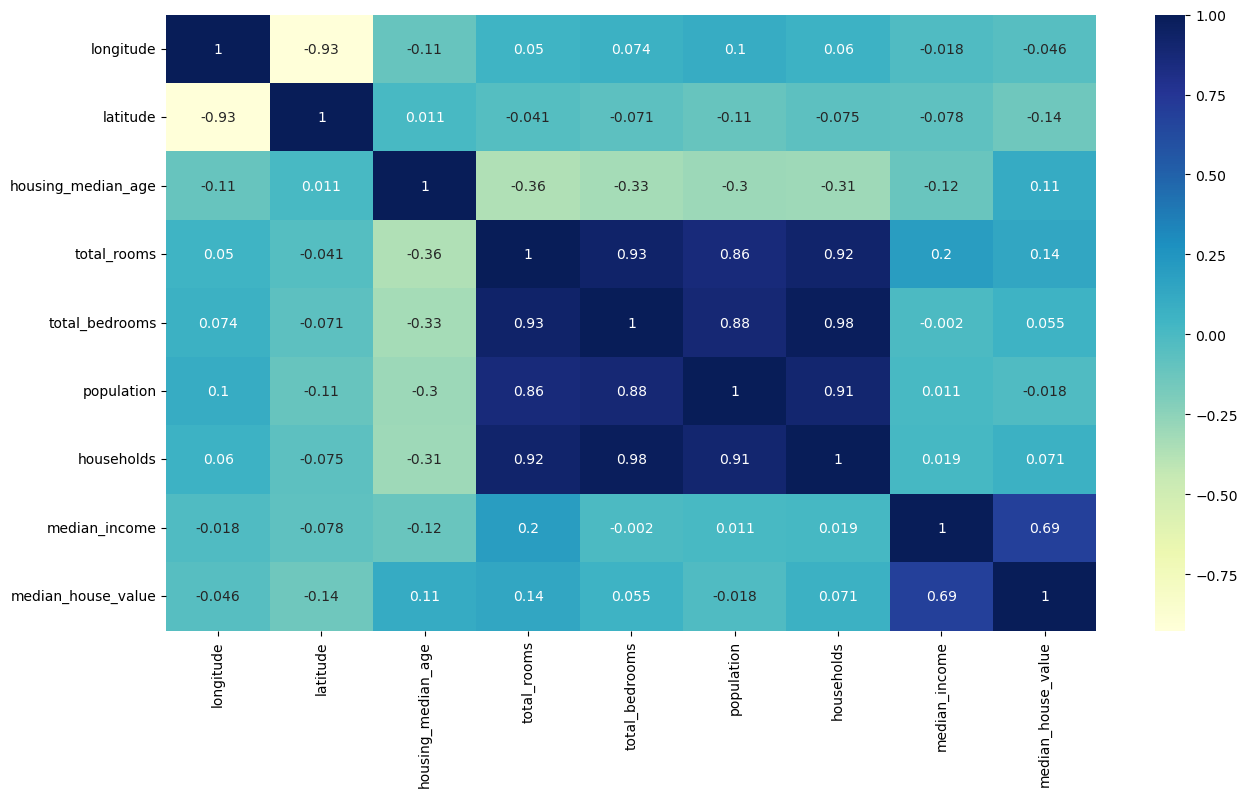

In [100]:
plt.figure(figsize=(15,8))
sns.heatmap(z.corr() , annot=True , cmap= "YlGnBu" )

In [101]:
#we are taking the log of the feature variables which are either right skewed or left skewed in order to bring them into a normal distribution form , and 1 is added to each of them if in case the variable was zero
train_data['total_rooms'] = np.log(train_data["total_rooms"] + 1)
train_data['total_bedrooms'] = np.log(train_data["total_bedrooms"] + 1)
train_data['population'] = np.log(train_data["population"] + 1)
train_data['households'] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

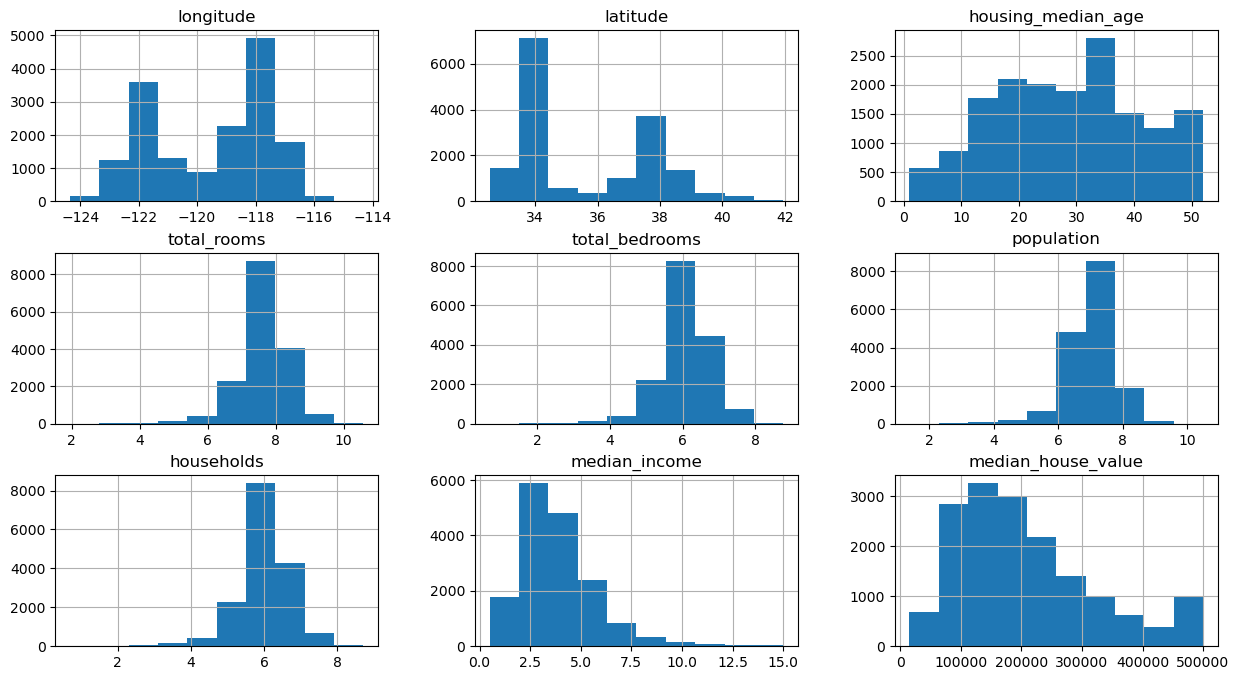

In [102]:
train_data.hist(figsize=(15,8))

In [103]:
train_data.ocean_proximity.value_counts()# done in order to find the number of values represented by each of the variables in ocean_proximity   

ocean_proximity
<1H OCEAN     7223
INLAND        5166
NEAR OCEAN    2126
NEAR BAY      1826
ISLAND           5
Name: count, dtype: int64

In [104]:
#OneHotEncoding the categorical variable
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3139,False,True,False,False,False
5858,True,False,False,False,False
19506,False,True,False,False,False
4321,True,False,False,False,False
775,False,False,False,True,False
...,...,...,...,...,...
19031,False,True,False,False,False
9445,False,True,False,False,False
12676,False,True,False,False,False
3373,True,False,False,False,False


In [105]:
train_data = z.join(pd.get_dummies(train_data.ocean_proximity))
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3139,-118.17,34.87,9.0,1507.0,293.0,761.0,278.0,3.0184,87900.0,False,True,False,False,False
5858,-118.34,34.19,48.0,814.0,165.0,490.0,176.0,3.1406,223100.0,True,False,False,False,False
19506,-121.03,37.63,5.0,2881.0,584.0,1490.0,570.0,3.0398,120000.0,False,True,False,False,False
4321,-118.35,34.08,52.0,1003.0,200.0,514.0,204.0,3.8472,395700.0,True,False,False,False,False
775,-122.10,37.65,25.0,2538.0,494.0,1185.0,501.0,4.5417,194400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19031,-122.02,38.37,16.0,2495.0,331.0,1118.0,338.0,6.4894,198000.0,False,True,False,False,False
9445,-119.90,37.49,13.0,2230.0,443.0,920.0,361.0,3.0000,112000.0,False,True,False,False,False
12676,-121.42,38.56,21.0,2066.0,748.0,2548.0,734.0,1.3571,55000.0,False,True,False,False,False
3373,-118.30,34.26,37.0,2824.0,633.0,1619.0,573.0,3.5568,184500.0,True,False,False,False,False


<Axes: >

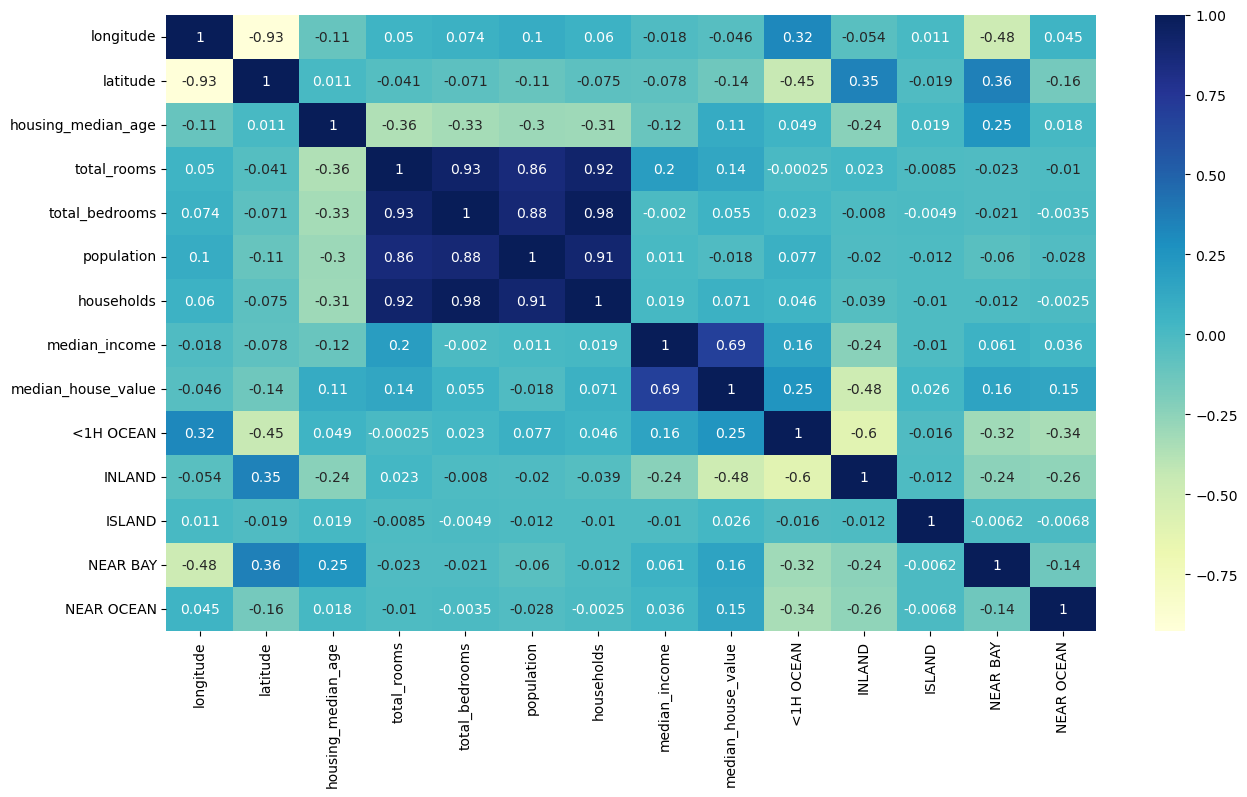

In [106]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

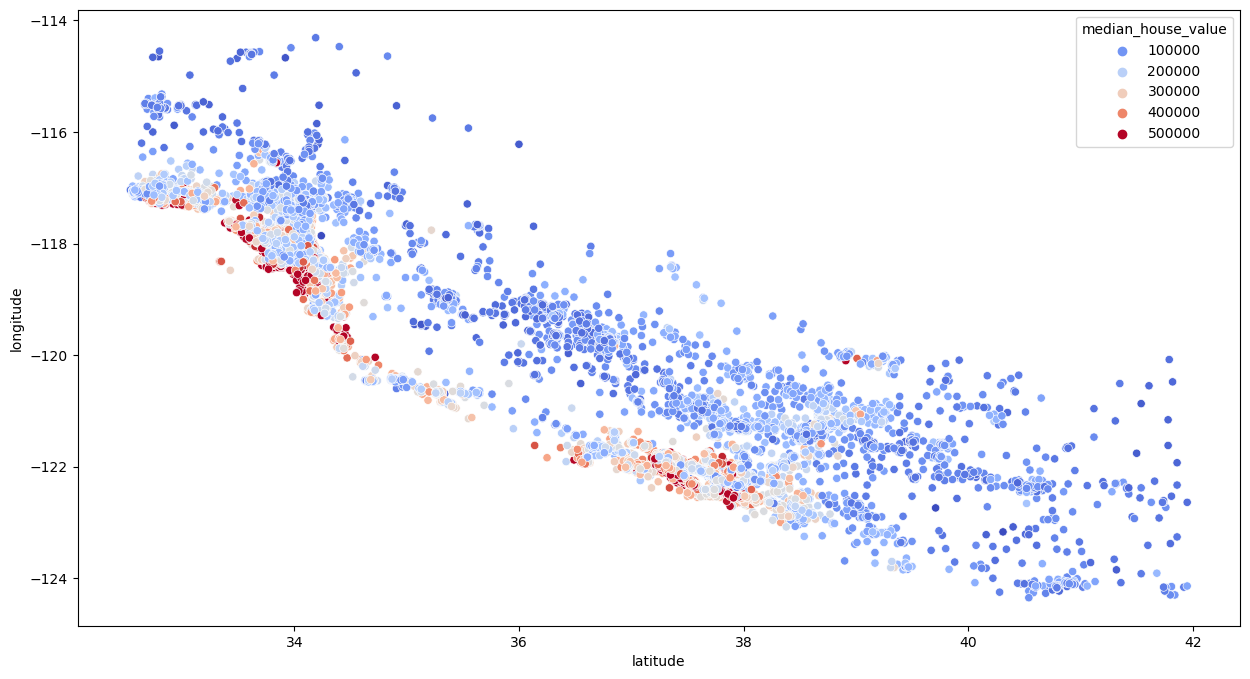

In [109]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude" , y = "longitude" , data=train_data , hue="median_house_value" , palette="coolwarm")

In [113]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3139,-118.17,34.87,9.0,1507.0,293.0,761.0,278.0,3.0184,87900.0,False,True,False,False,False
5858,-118.34,34.19,48.0,814.0,165.0,490.0,176.0,3.1406,223100.0,True,False,False,False,False
19506,-121.03,37.63,5.0,2881.0,584.0,1490.0,570.0,3.0398,120000.0,False,True,False,False,False
4321,-118.35,34.08,52.0,1003.0,200.0,514.0,204.0,3.8472,395700.0,True,False,False,False,False
775,-122.10,37.65,25.0,2538.0,494.0,1185.0,501.0,4.5417,194400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19031,-122.02,38.37,16.0,2495.0,331.0,1118.0,338.0,6.4894,198000.0,False,True,False,False,False
9445,-119.90,37.49,13.0,2230.0,443.0,920.0,361.0,3.0000,112000.0,False,True,False,False,False
12676,-121.42,38.56,21.0,2066.0,748.0,2548.0,734.0,1.3571,55000.0,False,True,False,False,False
3373,-118.30,34.26,37.0,2824.0,633.0,1619.0,573.0,3.5568,184500.0,True,False,False,False,False
